In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
InceptionV3_MODEL=tf.keras.applications.InceptionV3(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')

In [4]:
len(InceptionV3_MODEL.layers)

311

In [6]:
InceptionV3_MODEL.layers[101].name

'conv2d_34'

In [7]:
for layer in InceptionV3_MODEL.layers[:101]:
    layer.trainable=False

In [8]:
InceptionV3_MODEL.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
model=tf.keras.models.Sequential([
                                  InceptionV3_MODEL,
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.5, name='Dropout_Regularization1'),
                                  tf.keras.layers.Dense(4096, activation='relu'),
                                  tf.keras.layers.Dropout(0.5, name='Dropout_Regularization2'),
                                  tf.keras.layers.Dense(5844, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
Dropout_Regularization1 (Dro (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization2 (Dro (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5844)             

In [11]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
batch_size = 256
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
train_data_dir = '../datasets/group4_set_128/set_128/train/'
valid_data_dir = '../datasets/group4_set_128/set_128/valid/'

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
#     rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
#flow training images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 321129 images belonging to 5844 classes.


In [14]:
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 46752 images belonging to 5844 classes.


In [15]:
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = train_generator.n // batch_size,
    validation_data = valid_generator,
    validation_steps = valid_generator.n // batch_size,
    epochs = 100,
    workers = 2,
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1254/1254 [==============================] - 452s 361ms/step - loss: 8.3263 - acc: 0.0025 - val_loss: 7.1874 - val_acc: 0.0188
Epoch 2/100
1254/1254 [==============================] - 419s 334ms/step - loss: 6.6525 - acc: 0.0347 - val_loss: 5.8243 - val_acc: 0.0904
Epoch 3/100
1254/1254 [==============================] - 402s 320ms/step - loss: 5.7641 - acc: 0.0864 - val_loss: 5.1905 - val_acc: 0.1502
Epoch 4/100
1254/1254 [==============================] - 403s 321ms/step - loss: 5.2067 - acc: 0.1348 - val_loss: 4.9305 - val_acc: 0.1766
Epoch 5/100
1254/1254 [==============================] - 403s 321ms/step - loss: 4.7893 - acc: 0.1767 - val_loss: 4.5260 - val_acc: 0.2264
Epoch 6/100
1254/1254 [==============================] - 404s 322ms/step - loss: 4.4602 - acc: 0.2137 - val_loss: 4.3369 - val_acc: 0.2537
Epoch 7/100
1254/1254 [==============================] - 404s 322ms/step - loss: 4.1760 - 

KeyboardInterrupt: 

In [15]:
history.model.save('group1_06302020')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: group1_06302020\assets


In [19]:
tf.keras.models.save_model(history.model, 'group5run2.h5', include_optimizer=False)

<Figure size 432x288 with 0 Axes>

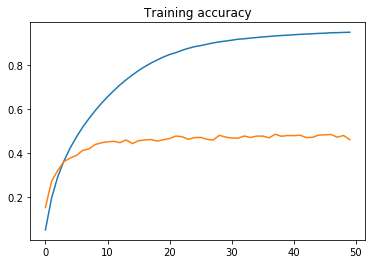

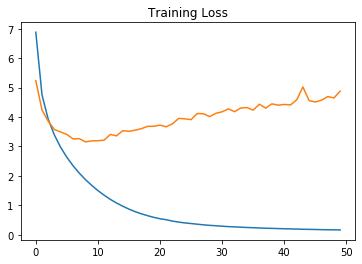

<Figure size 432x288 with 0 Axes>

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training Loss')
plt.figure()